# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidance to answer the following questions.

1. Which hosts are the busiest and why?
2. How many neighborhood groups are available and which shows up the most?
3. Are private rooms the most popular in manhattan?
4. Which hosts are the busiest and based on their reviews?
5. Which neighorhood group has the highest average price?
6. Which neighborhood group has the highest total price?
7. Which top 5 hosts have the highest total price?
8. Who currently has no (zero) availability with a review count of 100 or more?
9. What host has the highest total of prices and where are they located?
10. When did Danielle from Queens last receive a review?

You will be given **4 hours** to complete this assignment. 
**Be Advised** I will go dark for this intire assignment time period. That said, any questions that you would like to ask about the data, or the project **MUST** be asked before the time starts. Once the time has started, I can no longer give information.

This is to similate what you will face when you are out in the wild. 

Happy Coding!

In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from termcolor import colored

In [7]:
air_bnb = pd.read_csv('AB_NYC_2019.csv')
air_bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,7/27/2017,0.16,1,0
1,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2/13/2016,0.04,1,0
2,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83
3,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,1/2/2015,0.02,1,0
4,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,1/1/2016,0.14,1,83






There are 5 neighbourhood groups and Manhattan shows up the most.






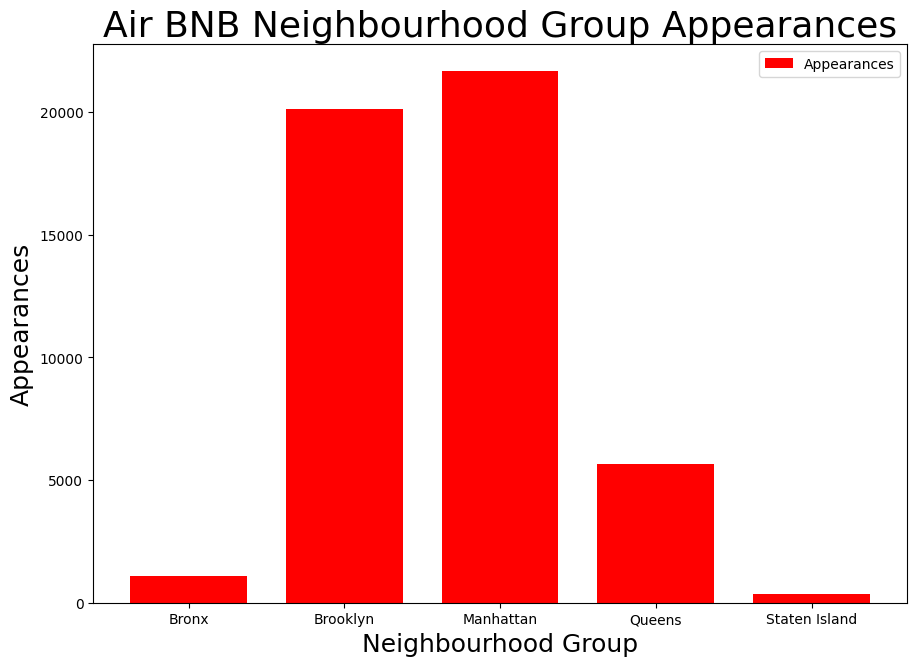

In [276]:
# How many neighborhood groups are available and which shows up the most?

x, y = np.unique(air_bnb['neighbourhood_group'], return_counts=True)

print(colored(f'\n\n\n\nThere are {len(x)} neighbourhood groups and Manhattan shows up the most.\n\n\n\n', 'blue'))

plt.figure(figsize = (10.5, 7.25))
plt.bar(x, y, color = 'r', width = 0.75, label = "Appearances")
plt.xlabel('Neighbourhood Group', fontsize = '18')
plt.ylabel('Appearances', fontsize = '18')
plt.title('Air BNB Neighbourhood Group Appearances', fontsize = '26')
plt.legend()
plt.show()





There are 7,982 Private rooms but 13,199 Entire home/apts. Private rooms are not the most popular in Manhattan. 






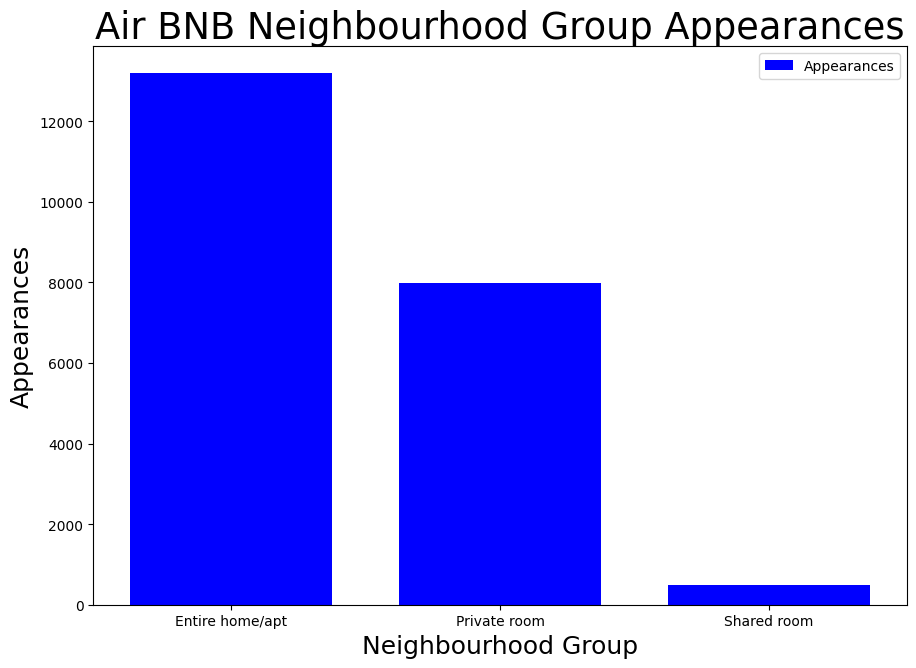

In [274]:
# Are private rooms the most popular in manhattan?

x, y = np.unique(air_bnb.loc[air_bnb['neighbourhood_group'] == 'Manhattan']['room_type'], return_counts=True)

entire_home_apt_count = format(y[0], ',')
private_room_count = format(y[1], ',')

print(colored(f'\n\n\n\nThere are {private_room_count} {x[1]}s but {entire_home_apt_count} {x[0]}s. Private rooms are not the most popular in Manhattan. \n\n\n\n', 'blue'))

plt.figure(figsize = (10.5, 7.25))
plt.bar(x, y, color = 'b', width = 0.75, label = "Appearances")
plt.xlabel('Neighbourhood Group', fontsize = '18')
plt.ylabel('Appearances', fontsize = '18')
plt.title('Air BNB Neighbourhood Group Appearances', fontsize = '26.5')
plt.legend()
plt.show()





Based on reviews, Michael is the busiest at 11,081 reviews. Followed by David, John, Jason, and Alex. 






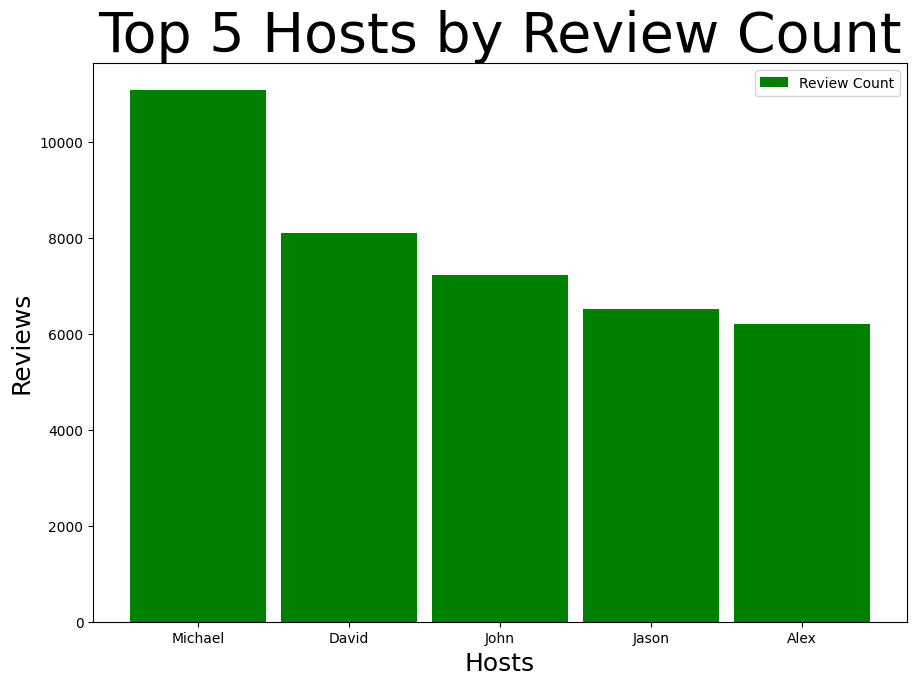

In [270]:
# Which hosts are the busiest based on their reviews?

top_ten_hosts_by_review_count = air_bnb[['host_name', 'number_of_reviews']].groupby('host_name').sum().reset_index().sort_values(by = ['number_of_reviews'], ascending=False).head(5)

x = top_ten_hosts_by_review_count['host_name']
y = top_ten_hosts_by_review_count['number_of_reviews']
max_tie = format(max(y), ',')

print(colored(f'\n\n\n\nBased on reviews, Michael is the busiest at {max_tie} reviews. Followed by David, John, Jason, and Alex. \n\n\n\n', 'blue'))

plt.figure(figsize = (10.5, 7.25))
plt.bar(x, y, color = 'g', width = 0.9, label = "Review Count")
plt.xlabel('Hosts', fontsize = '18')
plt.ylabel('Reviews', fontsize = '18')
plt.title('Top 5 Hosts by Review Count', fontsize = '40')
plt.legend()
plt.show()





Manhattan has the highest average price at $196.88. 






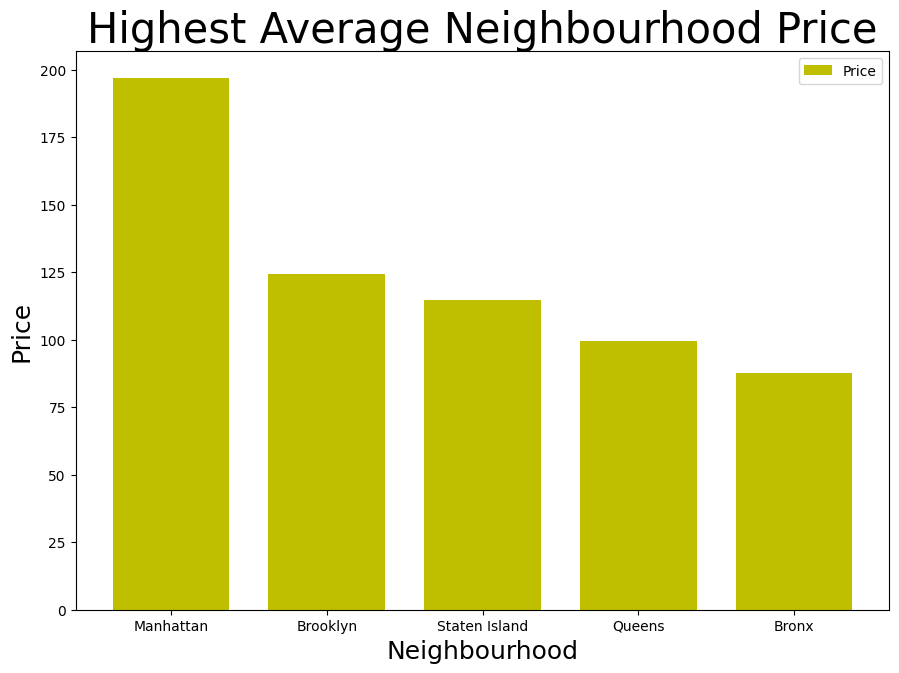

In [279]:
# Which neighorhood group has the highest average price?

neighbourhood_group_by_highest_avg_price = air_bnb[['neighbourhood_group', 'price']].groupby('neighbourhood_group').mean().round({'price': 2}).reset_index().sort_values(by = 'price', ascending=False).head(10)

x = neighbourhood_group_by_highest_avg_price['neighbourhood_group']
y = neighbourhood_group_by_highest_avg_price['price']
max_highest_neighbourhood_avg_price = format(max(y), ',')

print(colored(f'\n\n\n\nManhattan has the highest average price at ${max_highest_neighbourhood_avg_price}. \n\n\n\n', 'blue'))

plt.figure(figsize = (10.5, 7.25))
plt.bar(x, y, color = 'y', width = 0.75, label = "Price")
plt.xlabel('Neighbourhood', fontsize = '18')
plt.ylabel('Price', fontsize = '18')
plt.title('Highest Average Neighbourhood Price', fontsize = '30')
plt.legend()
plt.show()





Manhattan has the highest total price at $4,264,527. 






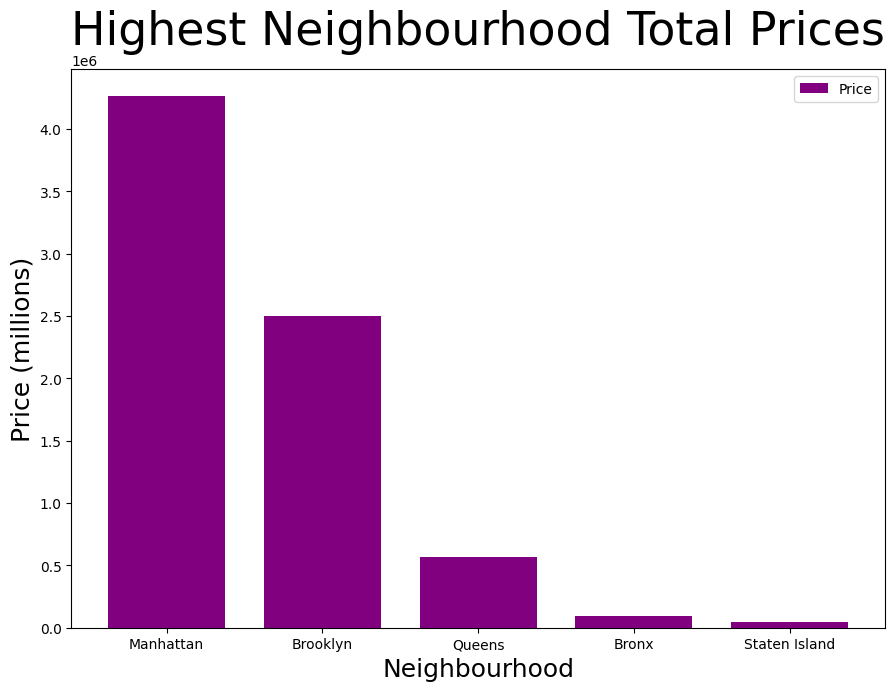

In [282]:
# Which neighborhood group has the highest total price?

highest_neighbourhood_total_price = air_bnb[['neighbourhood_group', 'price']].groupby('neighbourhood_group').sum().reset_index().sort_values(by = ['price'], ascending=False).head(5)

x = highest_neighbourhood_total_price['neighbourhood_group']
y = highest_neighbourhood_total_price['price']
max_neighbourhood_total_price = format(max(y), ',')

print(colored(f'\n\n\n\nManhattan has the highest total price at ${max_neighbourhood_total_price}. \n\n\n\n', 'blue'))

plt.figure(figsize = (10.5, 7.25))
plt.bar(x, y, color = 'purple', width = 0.75, label = "Price")
plt.xlabel('Neighbourhood', fontsize = '18')
plt.ylabel('Price (millions)', fontsize = '18')
plt.title('Highest Neighbourhood Total Prices', fontsize = '33')
plt.legend()
plt.show()






Sonder (NYC) has the highest total host price at $82,795. Followed by Blueground, Michael, David, and Alex. 






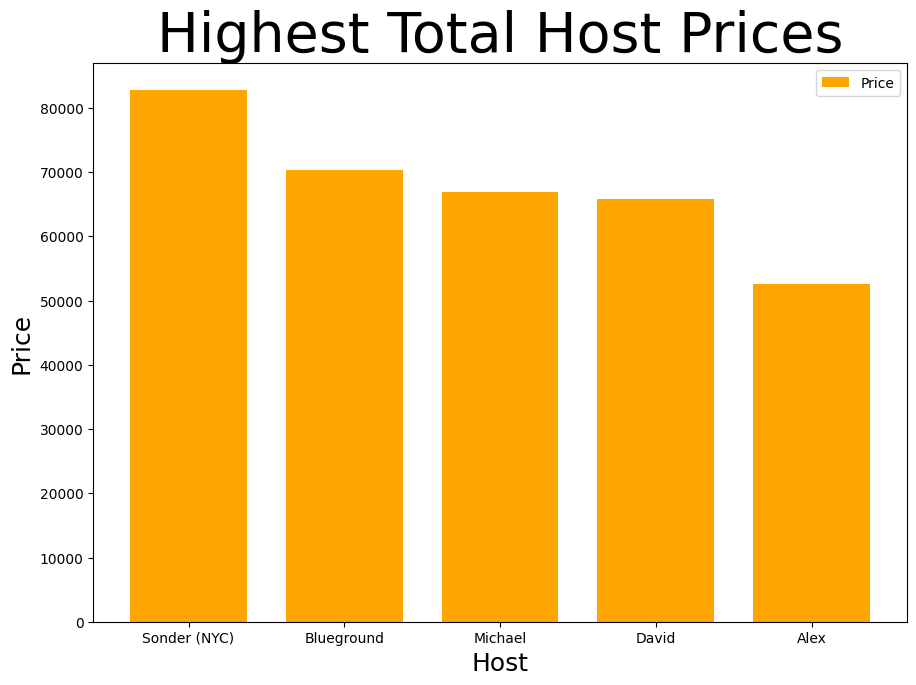

In [285]:
# Which top 5 hosts have the highest total price?

highest_price = air_bnb[['host_name', 'price']].groupby('host_name').sum().reset_index().sort_values(by = ['price'], ascending=False).head(5)

x = highest_price['host_name']
y = highest_price['price']
max_host_total_price = format(max(y), ',')
print(colored(f'\n\n\n\nSonder (NYC) has the highest total host price at ${max_host_total_price}. Followed by Blueground, Michael, David, and Alex. \n\n\n\n', 'blue'))

plt.figure(figsize = (10.5, 7.25))
plt.bar(x, y, color = 'orange', width = 0.75, label = "Price")
plt.xlabel('Host', fontsize = '18')
plt.ylabel('Price', fontsize = '18')
plt.title('Highest Total Host Prices', fontsize = '40')
plt.legend()
plt.show()

In [175]:
# Who currently has no (zero) availability with a review count of 100 or more?

host_reviews = host_reviews.loc[(host_reviews['number_of_reviews'] > 100) & (host_reviews['availability_365'] == 0)][['host_name', 'number_of_reviews', 'availability_365']].groupby('host_name').sum().reset_index().sort_values(by = ['number_of_reviews'], ascending=False)
max_number_of_reviews = format(max(host_reviews['number_of_reviews']), ',')

print(colored(f'\n\n\n\nGurpreet Singh has the highest number of reviews to availability ratio at {max_number_of_reviews}. Followed by Gurpreet Singh, Emily And Joel, Andy & Friends, En & Lora, Dragan, Jo & Savannah, Mariluz, Neil & Katie, Jenifer, Véronique, Emmy, Ehren, Lasata, AJ And Freddy, Yaniv, Cedrick, Hebert, Kestrel, Taylor & Tee, Karece, Tamicka, MaryEllen, Aurea, Catrina, Airamis, Megan E, Qiyao, and DeLex. \n\n\n\n', 'blue'))

host_reviews





Gurpreet Singh has the highest number of reviews to availability ratio at 1,157. Followed by Gurpreet Singh, Emily And Joel, Andy & Friends, En & Lora, Dragan, Jo & Savannah, Mariluz, Neil & Katie, Jenifer, Véronique, Emmy, Ehren, Lasata, AJ And Freddy, Yaniv, Cedrick, Hebert, Kestrel, Taylor & Tee, Karece, Tamicka, MaryEllen, Aurea, Catrina, Airamis, Megan E, Qiyao, and DeLex. 






,host_name,number_of_reviews,availability_365
12,Gurpreet Singh,1157,0
9,Emily And Joel,423,0
2,Andy & Friends,348,0
11,En & Lora,341,0
7,Dragan,304,0
15,Jo & Savannah,291,0
19,Mariluz,241,0
22,Neil & Katie,237,0
14,Jenifer,206,0
26,Véronique,196,0






Sonder (NYC) has the highest total host price at $82,795. All availability from Sonder (NYC) is located in Manhattan. 






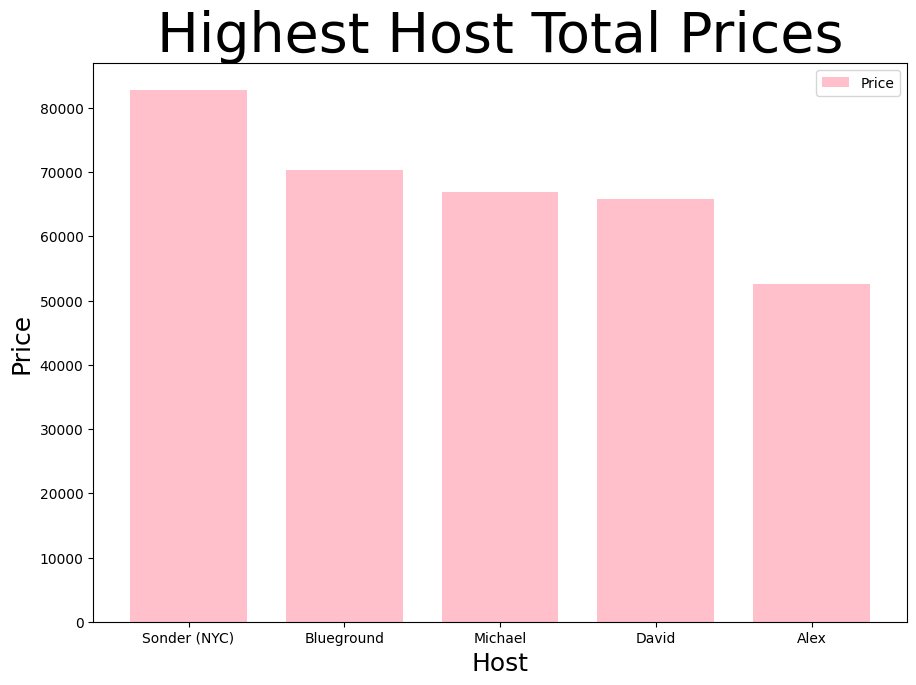

In [287]:
# What host has the highest total of prices and where are they located?

highest_price = air_bnb[['host_name', 'price', 'neighbourhood_group']].groupby('host_name').sum().reset_index().sort_values(by = ['price'], ascending=False).head(5)

x = highest_price['host_name']
y = highest_price['price']
max_host_total_price = format(max(y), ',')
print(colored(f'\n\n\n\nSonder (NYC) has the highest total host price at ${max_host_total_price}. All availability from Sonder (NYC) is located in Manhattan. \n\n\n\n', 'blue'))

plt.figure(figsize = (10.5, 7.25))
plt.bar(x, y, color = 'pink', width = 0.75, label = "Price")
plt.xlabel('Host', fontsize = '18')
plt.ylabel('Price', fontsize = '18')
plt.title('Highest Host Total Prices', fontsize = '40')
plt.legend()
plt.show()




In [66]:
# When did Danielle from Queens last receive a review?

danielles_reviews = air_bnb.loc[(air_bnb['host_name'] == 'Danielle') & (air_bnb['neighbourhood_group'] == 'Queens')].sort_values(by='last_review', ascending=False)

print(colored(f'\n\n\n\nDanielle\'s last review was left on 7/8/2019.\n\n\n\n', 'blue'))

danielles_reviews





Danielle's last review was left on 7/8/2019.






,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
44245,18173787,Cute Tiny Room Family Home by LGA NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76380,-73.87238,Private room,48,1,436,7/8/2019,16.03,5,337
44243,17222454,Sun Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76367,-73.87088,Private room,48,1,417,7/7/2019,14.36,5,338
44239,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,7/6/2019,16.22,5,341
47078,17754072,Bed in Family Home Near LGA Airport,26432133,Danielle,Queens,East Elmhurst,40.76389,-73.87155,Shared room,38,1,224,7/6/2019,7.96,5,80
41884,5115372,Comfy Room Family Home LGA Airport NO CLEANING...,26432133,Danielle,Queens,East Elmhurst,40.76374,-73.87103,Private room,54,1,430,7/3/2019,13.45,5,347
24374,26814763,One bedroom with full bed / 1 stop from Manhattan,201647469,Danielle,Queens,Long Island City,40.74565,-73.94699,Private room,108,2,13,6/20/2019,1.74,1,333
5901,21386105,Quiet & clean 1br haven with balcony near the ...,154256662,Danielle,Queens,Astoria,40.77134,-73.92424,Entire home/apt,250,3,1,1/2/2018,0.05,1,180
42564,13151075,ASTORIA APARTMENT OUTDOOR SPACE,18051286,Danielle,Queens,Astoria,40.77221,-73.92901,Private room,50,1,0,NaN,NaN,1,0


## Further Questions

1. Which host has the most listings?

In [298]:
host_most_listings = air_bnb[['host_name']].mode()
hml = host_most_listings['host_name'][0]
print(colored(f'\n\n\n\n{hml} has the most listings.', 'blue'))
host_most_listings





Michael has the most listings.


,host_name
0,Michael


2. How many listings have completely open availability?

In [300]:
listings_with_completely_open_availability = air_bnb.loc[(air_bnb['availability_365'] == 365)]['availability_365'].count()
completely_open = format(listings_with_completely_open_availability, ',')
print(colored(f'\n\n\n\nThere\'s {completely_open} listings that have completely open availability.', 'blue'))
listings_with_completely_open_availability





There's 1,295 listings that have completely open availability.


1295

3. What room_types have the highest review numbers?





Entire home/apt has the highest review numbers. 






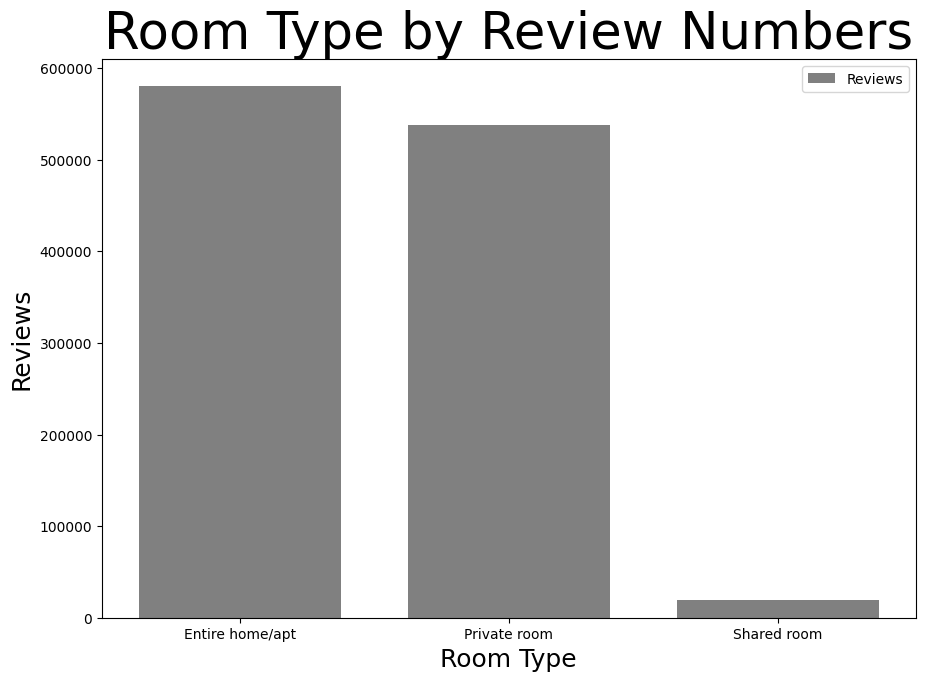

In [290]:
room_type_by_review_numbers = air_bnb[['room_type', 'number_of_reviews']].groupby('room_type').sum().reset_index()

x = room_type_by_review_numbers['room_type']
y = room_type_by_review_numbers['number_of_reviews']

max_host_total_price = format(max(y), ',')
print(colored(f'\n\n\n\nEntire home/apt has the highest review numbers. \n\n\n\n', 'blue'))

plt.figure(figsize = (10.5, 7.25))
plt.bar(x, y, color = 'grey', width = 0.75, label = "Reviews")
plt.xlabel('Room Type', fontsize = '18')
plt.ylabel('Reviews', fontsize = '18')
plt.title('Room Type by Review Numbers', fontsize = '37')
plt.legend()
plt.show()

# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please describe them here.

-- Add your conclusion --

In [ ]:
# How many neighborhood groups are available and which shows up the most?
There are 5 neighbourhood groups and Manhattan shows up the most.
# Are private rooms the most popular in manhattan?
There are 7,982 Private rooms but 13,199 Entire home/apts. Private rooms are not the most popular in Manhattan. 
# Which hosts are the busiest based on their reviews?
Based on reviews, Michael is the busiest at 11,081 reviews. Followed by David, John, Jason, and Alex. 
# Which neighorhood group has the highest average price?
Manhattan has the highest average price at $196.88.  
# Which top 5 hosts have the highest total price?
Sonder (NYC) has the highest total host price at $82,795. Followed by Blueground, Michael, David, and Alex. 
# Who currently has no (zero) availability with a review count of 100 or more?
Gurpreet Singh has the highest number of reviews to availability ratio at 1,157. Followed by Gurpreet Singh, Emily And Joel, Andy & Friends, En & Lora, Dragan, Jo & Savannah, Mariluz, Neil & Katie, Jenifer, Véronique, Emmy, Ehren, Lasata, AJ And Freddy, Yaniv, Cedrick, Hebert, Kestrel, Taylor & Tee, Karece, Tamicka, MaryEllen, Aurea, Catrina, Airamis, Megan E, Qiyao, and DeLex. 
# What host has the highest total of prices and where are they located?
Sonder (NYC) has the highest total host price at $82,795. All availability from Sonder (NYC) is located in Manhattan.
# When did Danielle from Queens last receive a review?
Danielle's last review was left on 7/8/2019.
# Which host has the most listings?
Michael has the most listings.
# How many listings have completely open availability?
There's 1295 listings that have completely open availability.
# What room_types have the highest review numbers?
Entire home/apt has the highest review numbers.